In [1]:
import random
import time
import numpy as np


import warnings
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
warnings.filterwarnings("ignore")

# Load

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# EDA

In [4]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

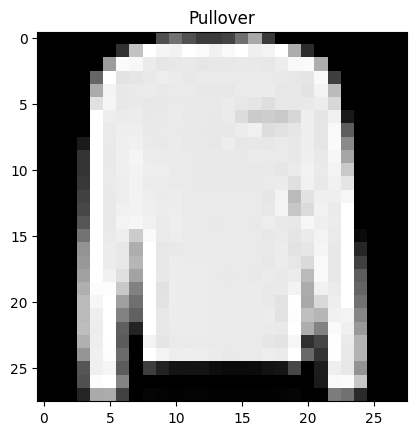

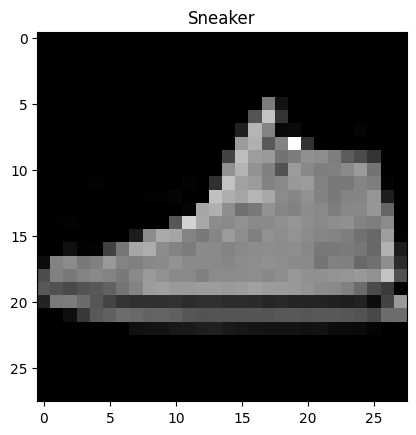

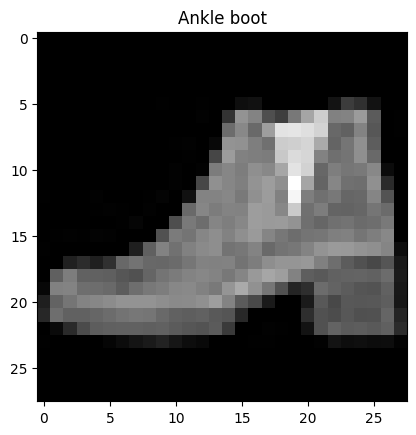

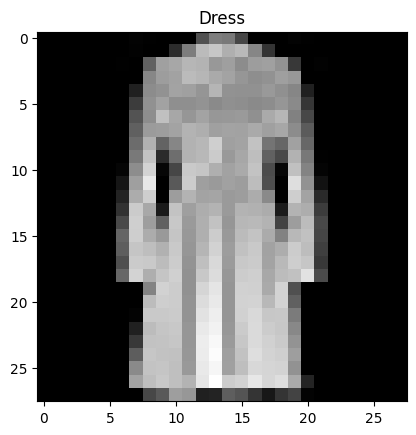

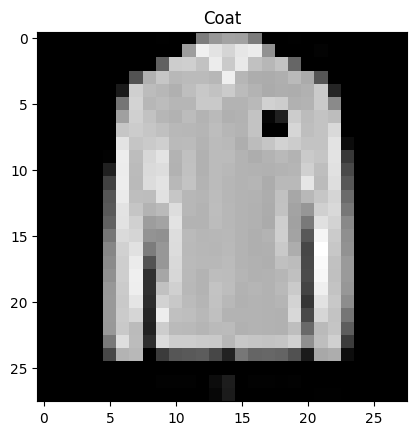

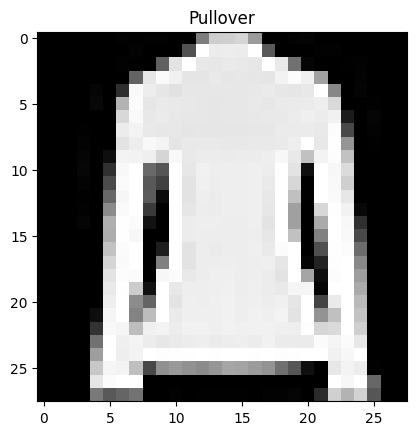

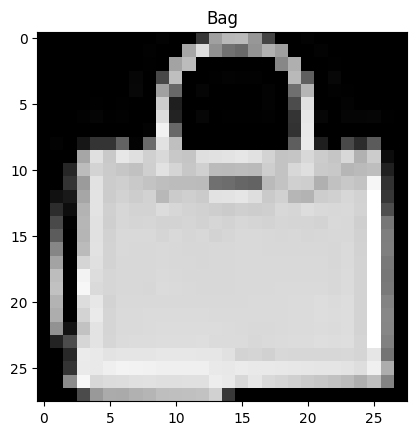

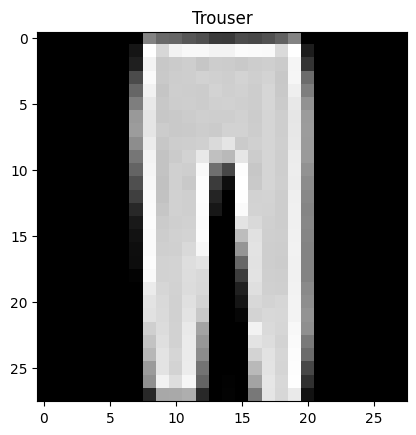

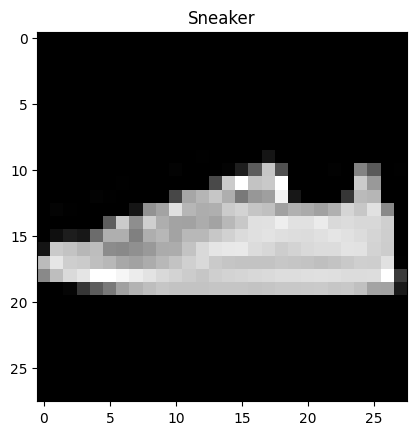

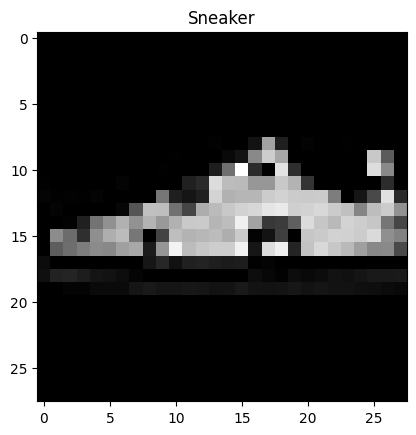

In [5]:
for i in range(10):
    idx = random.randint(0, train_images.shape[0] - 1)
    img = train_images[idx].reshape((28, 28))
    plt.imshow(img, cmap="gray")
    plt.title(f"{class_names[train_labels[idx]]}")
    plt.show()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
import pandas as pd
pd.DataFrame(train_labels).value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

# Preprocessing

In [9]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3500 # максимальне число епох                                          було 3000
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

In [10]:
# Перетворюємо цілочисельні пікселі на тип float32
train_images, test_images = np.array(train_images, np.float32), np.array(test_images, np.float32)

# # Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
# train_images, test_images = train_images.reshape([-1, num_features]), test_images.reshape([-1, num_features])

# # Нормалізуємо значення пікселів
# train_images, test_images = train_images / 255., test_images / 255.

# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_images))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Model

In [19]:
def plot_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss Change')
    ax1.legend()
    
    ax2.plot(history.history['accuracy'], label='Train')
    ax2.plot(history.history['val_accuracy'], label='Validation')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy change')
    ax2.legend()
    
    plt.show()

#### Simple Model: Adam - Hidden Sigmoid  (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [82]:
name_simple_model ='Simple Adam - Hidden Sigm (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [83]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [84]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [85]:
simple_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'), 
    tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'), 
    tf.keras.layers.Dense(256, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, activation='tanh', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [86]:
simple_model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [87]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [88]:
start_simple_model = time.time()

In [89]:
simple_history = simple_model.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 107s 20ms/step - accuracy: 0.6285 - loss: 0.9801 - val_accuracy: 0.7980 - val_loss: 0.5839 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 55s 12ms/step - accuracy: 0.7973 - loss: 0.5505 - val_accuracy: 0.8260 - val_loss: 0.4849 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.8149 - loss: 0.5123 - val_accuracy: 0.8360 - val_loss: 0.4931 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 61s 13ms/step - accuracy: 0.8321 - loss: 0.4590 - val_accuracy: 0.8200 - val_loss: 0.5137 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 76s 12ms/step - accuracy: 0.8429 - loss: 0.4262 - val_accuracy: 0.8330 - val_loss: 0.4891 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - accuracy: 0.8662 - loss: 0.3605 - val_accuracy: 0.8450 - val_loss: 0.4675 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 84s 13ms/step - a

In [90]:
end_simple_model  = time.time() - start_simple_model

In [91]:
test_loss_simple_model , test_acc_simple_model  = simple_model.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_simple_model)
print('Test loss:', test_loss_simple_model)
print ('Learning time, sec:', f'{end_simple_model:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9324 - loss: 0.1780
Test accuracy: 0.9247000217437744
Test loss: 0.2120884507894516
Learning time, sec: 1302.82


In [92]:
simple_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Normalize (Lambda)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

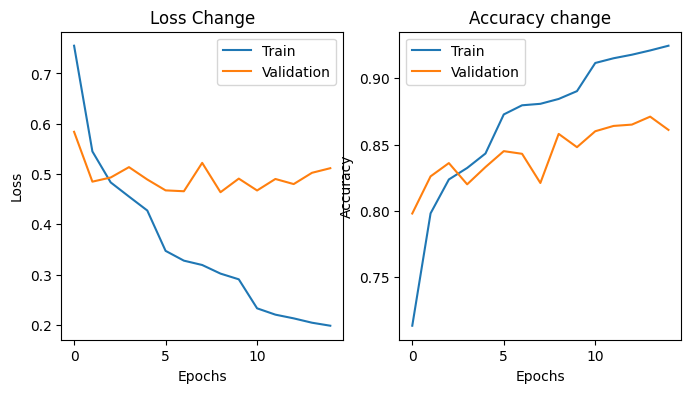

In [93]:
plot_curves(simple_history)

#### CNN Model: Adam - Hidden Sigmoid  (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS - 15 epochs,  batch = 2

In [11]:
name_cnn_model ='CNN Adam - Hidden Sigm (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2'

In [12]:
epochs = 15
batch_size = 2


optimizer = tf.keras.optimizers.Adam(beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-7)

In [13]:
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [14]:
train_images, test_images = train_images / 255.0, test_images / 255.0

cnn_model = tf.keras.Sequential([
    # tf.keras.layers.Lambda(lambda x: x / 255, name='Normalize'),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),  
    tf.keras.layers.Dense(256, activation='sigmoid', name='Dense1'),
    tf.keras.layers.Dense(128, activation='tanh', name='Dense2'),
    tf.keras.layers.Dropout(0.2, name='Drop1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [15]:
cnn_model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [17]:
start_cnn_model = time.time()

In [18]:
cnn_history = cnn_model.fit(test_images, test_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        initial_epoch=0,
                        validation_split=0.1,
                        callbacks=[lr_scheduler_callback])

Epoch 1/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 141s 28ms/step - accuracy: 0.5609 - loss: 1.1575 - val_accuracy: 0.7750 - val_loss: 0.5625 - learning_rate: 0.0010
Epoch 2/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 170s 38ms/step - accuracy: 0.7780 - loss: 0.5919 - val_accuracy: 0.7890 - val_loss: 0.5728 - learning_rate: 0.0010
Epoch 3/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 164s 29ms/step - accuracy: 0.8119 - loss: 0.5120 - val_accuracy: 0.8070 - val_loss: 0.5176 - learning_rate: 0.0010
Epoch 4/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 146s 33ms/step - accuracy: 0.8374 - loss: 0.4495 - val_accuracy: 0.8340 - val_loss: 0.4819 - learning_rate: 0.0010
Epoch 5/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 153s 34ms/step - accuracy: 0.8552 - loss: 0.4036 - val_accuracy: 0.8210 - val_loss: 0.5245 - learning_rate: 0.0010
Epoch 6/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 199s 33ms/step - accuracy: 0.8783 - loss: 0.3435 - val_accuracy: 0.8620 - val_loss: 0.3704 - learning_rate: 5.0000e-04
Epoch 7/15
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 223s 37ms/st

In [19]:
end_cnn_model  = time.time() - start_cnn_model

In [20]:
test_loss_cnn_model , test_acc_cnn_model  = cnn_model.evaluate(test_images,  test_labels)

print('Test accuracy:', test_acc_cnn_model)
print('Test loss:', test_loss_cnn_model)
print ('Learning time, sec:', f'{end_cnn_model:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9708 - loss: 0.0801
Test accuracy: 0.961899995803833
Test loss: 0.12649492919445038
Learning time, sec: 2830.27


In [21]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop1 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 735,776 (2.81 MB)

 Trainable params: 245,258 (958.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 490,518 (1.87 MB)

In [22]:
plot_curves(cnn_history)

NameError: name 'plot_curves' is not defined

# Comparison

In [81]:
print(f"|{'name':<130}|{'test_acc':<10}|{'test loss':<10}|{'learning time':<15}|")
for i in [25, 49, 50, 51, 53]:
    model_name = 'name_model_' + str(i)
    model_test_acc = 'test_acc_model_' + str(i)
    model_test_loss = 'test_loss_model_' + str(i)
    model_learning_time = 'end_model_' + str(i)
    print()
    print(f"|{globals()[model_name]:<130}|{f'{globals()[model_test_acc]:.5f}':<10}|{f'{globals()[model_test_loss]:.5f}':<10}|{f'{globals()[model_learning_time]:.2f}':<15}|")

|name                                                                                                                              |test_acc  |test loss |learning time  |

|25: Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2                        |0.91240   |0.23735   |865.75         |

|49: Adam - Hidden Sigm (256) + Sigmoid (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2        |0.91940   |0.21936   |712.60         |

|50: Adam - Hidden Sigm (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2           |0.92800   |0.20522   |834.60         |

|51: Adam - Hidden Sigm (256) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2     |0.92640   |0.21077   |850.26         |

|53: Adam - Hidden Sigm (256) + Leaky ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2 |0.92110 

Бажаної точності в 91% або вище вдалося досягти на декількох моделях:

1) №25 - 0.91260 на тестовому наборі (Adam - Hidden Sigm (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2  )
2) №49 - 0.92280 на тестовому наборі (Adam - Hidden Sigm (256) + Sigmoid (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2)
3) №50 - 0.92640 на тестовому наборі (Adam - Hidden Sigm (256) + Tanh (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2) 
4) №51 - 0.92850 на тестовому наборі (Adam - Hidden Sigm (256) + Leaky ReLU (128) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2 )
2) №53 - 0.9251% на тестовому наборі (Adam - Hidden Sigm (256) + Leaky ReLU (128, L2) + Drop (0.2) + ReLU (64) + Output Softmax (10) - LRS -  15 epochs,  batch = 2)

Усі моделі побудовані на оптимізаторі Adam з першим прихованим шаром з активаційною функцією сігмоїди, навчаються по 15 епох з батч-сайзом 2 і побудовані з вживанням LearningRateScheduler, але мають різну арітектуру шарів.

Інші архітектури моделі давали теж високий, але недостатньо гарний результат. 
Вживання регуляризаторів в цілому показало погіршення точності моделі, але в версії 53 вдалося підібрати параметри для регуляризації одного з прихованих шарів так, щоб полегшити модель і трохи пришвидшити її навчання.

З урахуванням часу, потрібного на фіт моделі, найкращіми можна вважати моделі 25 та 53